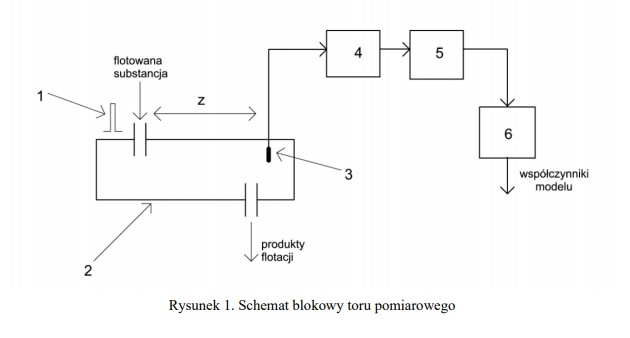


# Postać modelu opisująca zjawisko transportu ciepła
$$ \ T_m (z,t) = T_p +exp(\frac{V\cdot z}{2\cdot D})\cdot\int_0^t K_v(t-\tau)\cdot f(\tau) d\tau $$
$$\ K_v(t)=\frac{z}{2\cdot (\pi \cdot t^3 \cdot D)^{0.5}} \cdot exp (- \frac{z^2}{4\cdot D\cdot t}-\frac {V^2}{4 \cdot D} \cdot t) $$
$$\ t \in (0,t_r) -\text{czas} $$
$$\ t_r - \text{czas obserwacji procesu} $$
$$\ T_p - \text{temperatura poczatkowa} $$
$$\ f(t) = k\cdot \delta (t) - \text{wymuszenie w postaci krótkiego impulsu o amplitudzie k}$$
$$\ V - \text{prędkość przepływu flotowanej substancji} $$
$$\ D - \text{współczynnik dyfuzji ciepła} $$

### Importowanie potrzebnych bibliotek

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
my_data = pd.read_csv(r"C:\Users\margo\Dysk Google\Semestr_6\MIS\Projekt\OBIEKT.DAT",
    sep='\s+',names=['Time','Temperature'])
my_data.head()


,Time,Temperature
0,4.0,0.022222
1,8.0,0.016667
2,12.0,0.021111
3,16.0,0.016667
4,20.0,0.020000


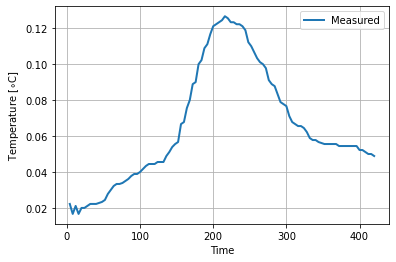

<Figure size 432x288 with 0 Axes>

In [4]:
%matplotlib inline

plt.plot(my_data['Time'],my_data['Temperature'],linewidth=2,label='Measured')
plt.xlabel('Time')
plt.ylabel('Temperature [$\circ$C]')
plt.grid()
plt.legend()
plt.show()
plt.tight_layout()

In [5]:
def temperature(t,z,Tp,V,D):
    return Tp+np.exp((V*z)/(2*D))*(z/(2*(np.pi*D*t**3)**0.5))*np.exp((-z**2/(4*D*t))-(t*V**2/(4*D)))

  

Wspolczynniki modelu: [1.07090512e-01 2.39684464e+02 1.06155741e+02]


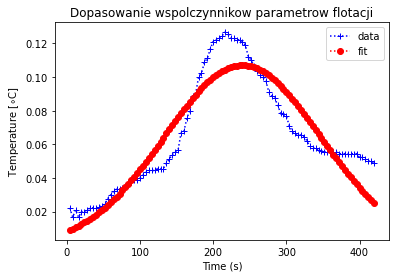

In [43]:
import pylab as plb
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

x = my_data['Time']
y = my_data['Temperature']

n = len(x)                          #the number of data
mean = sum(x*y)/n                   #note this correction
sigma = sum(y*(x-mean)**2)/n        #note this correction

def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,y,p0=[1,mean,sigma])
print(f'Wspolczynniki modelu: {popt}')
plt.plot(x,y,'b+:',label='data')
plt.plot(x,gaus(x,*popt),'ro:',label='fit')
plt.legend()
plt.title('Dopasowanie wspolczynnikow parametrow flotacji')
plt.xlabel('Time (s)')
plt.ylabel('Temperature [$\circ$C]')
plt.show()

In [21]:
# !pip install lmfit

[20.          0.51623977  0.08        0.067     ]


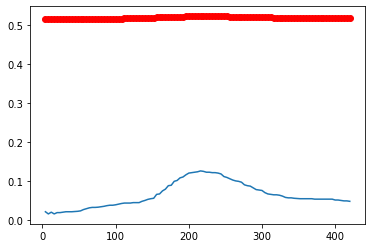

In [22]:
from scipy.optimize import curve_fit, leastsq
from scipy.special import expit




t = my_data['Time'].values

t = expit(t)

temp = my_data['Temperature'].values
temp = expit(temp)
g = [1,1,1,1]
c,cov = curve_fit(temperature,t,temp,g)


print(c)


n = len(my_data['Time'])
y = np.empty(n)
for i in range(n):
    y[i] = temperature(my_data['Time'][i],c[0],c[1],c[2],c[3])

%matplotlib inline
plt.plot(my_data['Time'],my_data['Temperature'])
plt.plot(my_data['Time'],y,'ro')

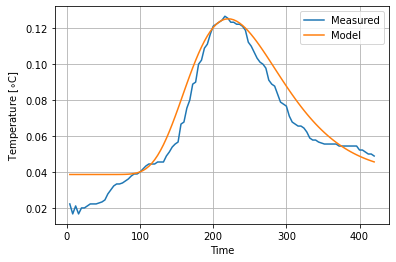

In [58]:
g = [20,0.0027,0.08,0.067]
k = 14.3
n = len(my_data['Time'])
y = np.empty(n)
for i in range(n):
    y[i] = k*temperature(my_data['Time'][i],g[0],g[1],g[2],g[3])

%matplotlib inline
plt.plot(my_data['Time'],my_data['Temperature'],label='Measured')
plt.plot(my_data['Time'],y,label='Model')
plt.xlabel('Time')
plt.ylabel('Temperature [$\circ$C]')
plt.grid()
plt.legend()

## Postac transmitancji opisujaca obiekt inercyjny pierwszego rzedu
$$ G(s) = \frac{K}{Ts+1} \\ $$

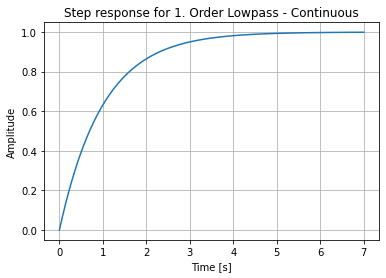

In [59]:
from scipy import signal
import matplotlib.pyplot as plt

lti = signal.lti([1], [1, 1])
t, y1 = signal.step(lti)
plt.plot(t, y1)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step response for 1. Order Lowpass - Continuous')
plt.grid()

In [72]:
T = 1
num = [1]
den = [T,1]
dt = 0.1
num,den,dt = signal.cont2discrete((num,den),dt)
num = num.flatten()
den = den.flatten()
print(f'num:{num}')
print(f'den:{den}')

num:[0.         0.09516258]
den:[ 1.         -0.90483742]


Text(0.5, 1.0, 'Step response for 1. Order Lowpass - Discrete')

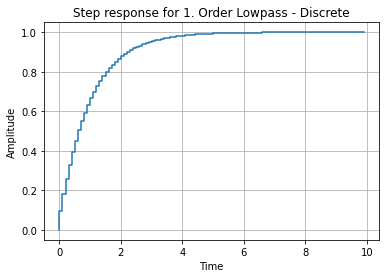

In [73]:
from scipy import signal
import matplotlib.pyplot as plt


lti = signal.dlti([num[1]],[den[0],den[1]],dt=0.1)
t, y2 = signal.dstep(lti)
plt.step(t, np.squeeze(y2))
plt.grid()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Step response for 1. Order Lowpass - Discrete')

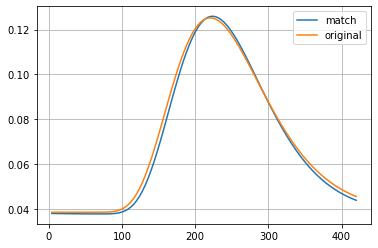

In [74]:
# z,Tp,V,D,k
g = [20,0.0027,0.096,0.07,14]
# g = [20,0.0027,0.112,0.059,17.3]
n = len(my_data['Time'])
y_new = np.empty(n)
for i in range(n):
    y_new[i] = g[4]*temperature(my_data['Time'][i],g[0],g[1],g[2],g[3])

tf = ([num[1]],[den[0],den[1]],0.1)
t_out, y1 = signal.dlsim(tf, y_new,x0=0.4)
plt.plot(my_data['Time'],y1,label='match')
plt.plot(my_data['Time'],y,label='original')
plt.legend()
plt.grid()

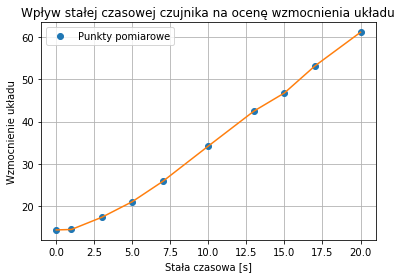

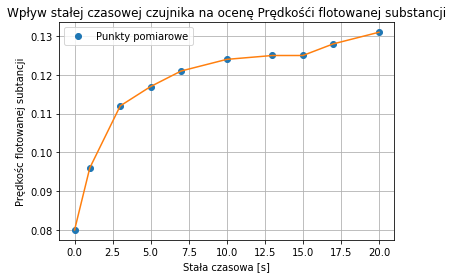

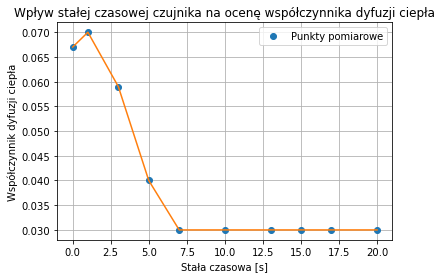

In [75]:
T = [0,1,3,5,7,10,13,15,17,20]
K = [14.3,14.4,17.3,21,25.8,34.2,42.5,46.8,53.2,61.2]
V = [0.08,0.096,0.112,0.117,0.121,0.124,0.125,0.125,0.128,0.131]
D = [0.067,0.07,0.059,0.04,0.03,0.03,0.03,0.03,0.03,0.03]

plt.figure(1)
plt.plot(T,K,'o',label='Punkty pomiarowe')
plt.plot(T,K)
plt.title('Wpływ stałej czasowej czujnika na ocenę wzmocnienia układu')
plt.grid()
plt.xlabel('Stała czasowa [s]')
plt.ylabel('Wzmocnienie układu')
plt.legend()

plt.figure(2)
plt.plot(T,V,'o',label='Punkty pomiarowe')
plt.plot(T,V)
plt.title('Wpływ stałej czasowej czujnika na ocenę Prędkośći flotowanej substancji')
plt.grid()
plt.xlabel('Stała czasowa [s]')
plt.ylabel('Prędkośc flotowanej subtancji')

plt.legend()

plt.figure(3)
plt.plot(T,D,'o',label='Punkty pomiarowe')
plt.plot(T,D)
plt.title('Wpływ stałej czasowej czujnika na ocenę współczynnika dyfuzji ciepła')
plt.grid()
plt.xlabel('Stała czasowa [s]')
plt.ylabel('Współczynnik dyfuzji ciepła')
plt.legend()